In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estabelecendo uma função para a probabilidade de ocorrência de um evento
def prob(z):
    return 1 / (1 + np.exp(-z))

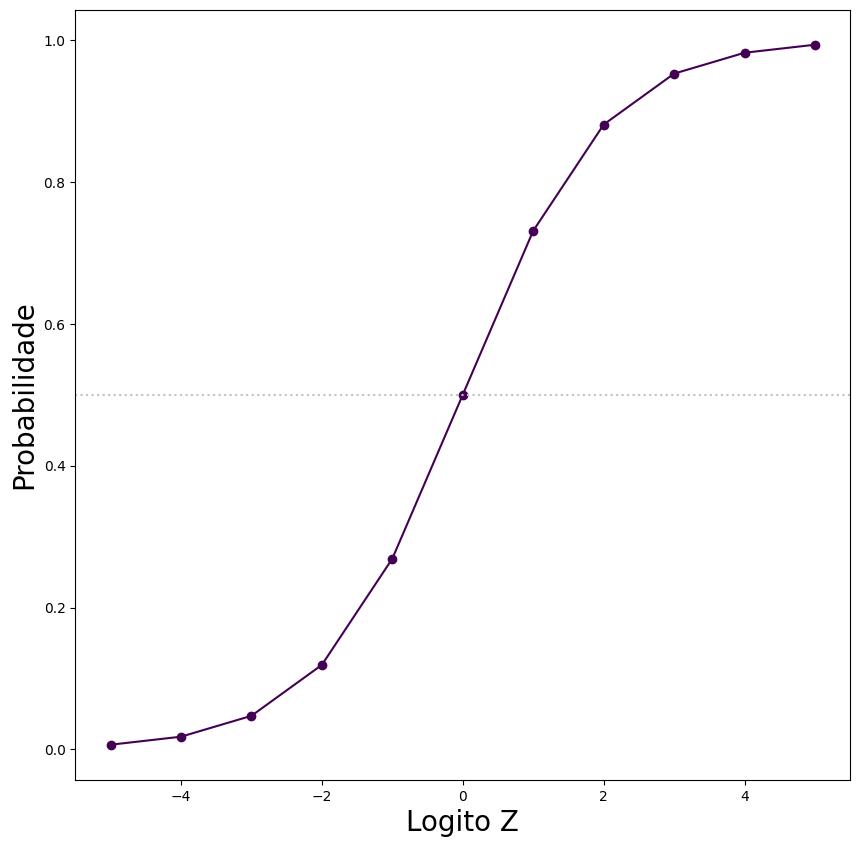

In [3]:
# In[ ]: Plotando a curva sigmóide teórica de ocorrência de um evento para um
#range do logito z entre -5 e +5

logitos = []
probs = []


for i in np.arange(-5,6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito':logitos,'probs':probs})

plt.figure(figsize=(10,10))
plt.plot(df.logito, df.probs, color="#440154FF")
plt.scatter(df.logito, df.probs, color = "#440154FF")
plt.axhline(y = df.probs.mean(), color = '#bdc3c7', linestyle = ':')
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.show()

In [8]:
# In[ ]:
#############################################################################
#                      REGRESSÃO LOGÍSTICA MULTINOMIAL                      #
#                EXEMPLO 04 - CARREGAMENTO DA BASE DE DADOS                 #
#############################################################################

df_atrasado_multinomial = pd.read_csv('atrasado_multinomial.csv',delimiter=',')
df_atrasado_multinomial


,estudante,atrasado,dist,sem
0,Gabriela,chegou atrasado segunda aula,20.500000,15
1,Patricia,chegou atrasado segunda aula,21.299999,18
2,Gustavo,chegou atrasado segunda aula,21.400000,16
3,Leticia,chegou atrasado segunda aula,31.500000,15
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16
...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10
96,Pedro,chegou atrasado primeira aula,15.000000,15
97,Horacio,chegou atrasado primeira aula,14.400000,15
98,Leandro,chegou atrasado segunda aula,22.200001,18


In [9]:
#Características das variáveis do dataset
df_atrasado_multinomial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [10]:
#Estatísticas univariadas
df_atrasado_multinomial.describe()

,dist,sem
count,100.000000,100.000000
mean,17.673000,13.810000
std,5.130299,3.329376
min,1.000000,10.000000
25%,14.950000,10.000000
50%,18.750000,15.000000
75%,21.000000,18.000000
max,31.500000,19.000000


In [11]:
# In[ ]: Note que a variável Y 'atrasado' está definida como objeto

#Tabela de frequências absolutas da variável 'atrasado' com labels
df_atrasado_multinomial['atrasado'].value_counts(sort=False)

atrasado
chegou atrasado segunda aula     35
chegou atrasado primeira aula    16
nao chegou atrasado              49
Name: count, dtype: int64

In [12]:
#Criando uma variável 'atrasado2' a partir da variável 'atrasado',
#com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit'
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'nao chegou atrasado',
                            'atrasado2'] = 0 #categoria de referência
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado primeira aula',
                            'atrasado2'] = 1
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado segunda aula',
                            'atrasado2'] = 2

In [13]:
df_atrasado_multinomial['atrasado2'] =\
    df_atrasado_multinomial['atrasado2'].astype('int64')

In [15]:
# In[ ]: Estimação do modelo logístico multinomial

from statsmodels.discrete.discrete_model import MNLogit

x = df_atrasado_multinomial.drop(columns=['estudante','atrasado','atrasado2'])
y = df_atrasado_multinomial['atrasado2']

In [16]:
#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

In [17]:
#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo_atrasado = MNLogit(endog=y, exog=X).fit()

Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10


In [18]:
#Parâmetros do modelo
modelo_atrasado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              atrasado2   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.7574
Time:                        21:42:50   Log-Likelihood:                -24.512
converged:                       True   LL-Null:                       -101.02
Covariance Type:            nonrobust   LLR p-value:                 4.598e-32
===============================================================================
atrasado2=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.1352     12.183     -2.720      0.007     -57.014      -9.256
dist            0.5588      0.243      2.297      0.022       0.082       1.036
sem             1.6699      0.577      2.895      0.004       0.539       2.801
-------------------------------------------------------------------------------
atrasado2=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -62.2922     14.675     -4.245      0.000     -91.055     -33.530
dist            1.0784      0.302      3.566      0.000       0.486       1.671
sem             2.8949      0.686      4.220      0.000       1.550       4.239
===============================================================================
"""

In [19]:
# In[ ]: Vamos definir uma função 'Qui2' para se extrair a estatística geral
# do modelo

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [20]:
# In[ ]: Estatística geral do 'modelo_atrasado'

Qui2(modelo_atrasado)

,Qui quadrado,pvalue
0,153.014842,3.802150e-35


In [21]:
# In[ ]: Fazendo predições para o 'modelo_atrasado'

# Exemplo: qual a probabilidade média de atraso para cada categoria da
#variável dependente, se o indivíduo tiver que percorrer 22km e passar
#por 12 semáforos?

#No nosso exemplo, tempos que:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

resultado = modelo_atrasado.predict(pd.DataFrame({'const':[1],
                                                   'dist':[22],
                                                   'sem':[12]})).round(4)

resultado

,0,1,2
0,0.6802,0.305,0.0148


In [22]:
#Uma maneira de identificar a classe do resultado de acordo com o predict

resultado.idxmax(axis=1)

0    0
dtype: int64

In [23]:
# In[ ]: Adicionando as probabilidades de ocorrência de cada uma das
#categorias de Y definidas pela modelagem, bem como a respectiva
#classificação, ao dataframe original

#Probabilidades de ocorrência das três categoriais
#Definição do array 'phats':
phats = modelo_atrasado.predict()
phats

array([[1.80102363e-02, 5.23387941e-01, 4.58601822e-01],
       [2.75130062e-06, 1.87367571e-02, 9.81260492e-01],
       [6.79619018e-04, 1.73471514e-01, 8.25848867e-01],
       [2.75947562e-07, 3.74792245e-03, 9.96251802e-01],
       [2.08378239e-02, 6.01588294e-01, 3.77573882e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.89390852e-07, 6.37240812e-03, 9.93627302e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [1.79364087e-06, 1.52746327e-02, 9.84723574e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [1.14468666e-08, 1.34770371e-03, 9.98652285e-01],
       [5.85478765e-02, 7.30993731e-01, 2.10458393e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [2.64359782e-02, 5.80967070e-01, 3.92596952e-01],
       [1.30075533e-06, 1.30990445e-02, 9.86899655e-01],
       [2.55399681e-05, 5.37916

In [24]:
#Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats

,0,1,2
0,1.801024e-02,0.523388,4.586018e-01
1,2.751301e-06,0.018737,9.812605e-01
2,6.796190e-04,0.173472,8.258489e-01
3,2.759476e-07,0.003748,9.962518e-01
4,2.083782e-02,0.601588,3.775739e-01
...,...,...,...
95,9.531361e-01,0.046317,5.471598e-04
96,4.146183e-01,0.557343,2.803830e-02
97,5.008256e-01,0.481441,1.773339e-02
98,1.049763e-06,0.011822,9.881774e-01


In [25]:
#Concatenando o dataframe original com o dataframe 'phats':
df_atrasado_multinomial = pd.concat([df_atrasado_multinomial, phats], axis=1)
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01
...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01


In [26]:
# Analisando o resultado de acordo com a categoria de resposta:
classificacao = phats.idxmax(axis=1)
classificacao


0     1
1     2
2     2
3     2
4     1
     ..
95    0
96    1
97    0
98    2
99    0
Length: 100, dtype: int64

In [27]:
#Adicionando a categoria de resposta 'classificacao' ao dataframe original,
#por meio da criação da variável 'predicao'
df_atrasado_multinomial['predicao'] = classificacao
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1
...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2


In [28]:
#Criando a variável 'predicao_label' a partir da variável 'predicao',
#respeitando os seguintes rótulos:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==0,
                            'predicao_label'] ='não chegou atrasado'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==1,
                            'predicao_label'] ='chegou atrasado primeira aula'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==2,
                            'predicao_label'] ='chegou atrasado segunda aula'

df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao,predicao_label
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1,chegou atrasado primeira aula
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2,chegou atrasado segunda aula
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2,chegou atrasado segunda aula
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2,chegou atrasado segunda aula
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1,chegou atrasado primeira aula
...,...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0,não chegou atrasado
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1,chegou atrasado primeira aula
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0,não chegou atrasado
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2,chegou atrasado segunda aula


In [29]:
# In[ ]: Eficiência global do modelo

#Criando uma tabela para comparar as ocorrências reais com as predições
table = pd.pivot_table(df_atrasado_multinomial,
                       index=['predicao_label'],
                       columns=['atrasado'],
                       aggfunc='size')

#Substituindo 'nan' por zero
table = table.fillna(0)
table

atrasado,chegou atrasado primeira aula,chegou atrasado segunda aula,nao chegou atrasado
predicao_label,,,
chegou atrasado primeira aula,12.0,5.0,2.0
chegou atrasado segunda aula,3.0,30.0,0.0
não chegou atrasado,1.0,0.0,47.0


In [30]:
#Transformando o dataframe 'table' para 'array', para que seja possível
#estabelecer o atributo 'diagonal'
table = table.to_numpy()
table

array([[12.,  5.,  2.],
       [ 3., 30.,  0.],
       [ 1.,  0., 47.]])

In [31]:
#Eficiência global do modelo
acuracia = table.diagonal().sum()/table.sum()
acuracia

0.89

In [34]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de não chegar atrasado (função 'go' do pacote 'plotly')

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1, intensity=df_atrasado_multinomial[0], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='não chegou atrasado'))

plot_figure.show()



In [ ]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de chegar atrasado à primeira aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[1],
    opacity=1, intensity=df_atrasado_multinomial[1], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à primeira aula'))

plot_figure.show()



In [ ]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de chegar atrasado à segunda aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[2],
    opacity=1, intensity=df_atrasado_multinomial[2], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à segunda aula'))

plot_figure.show()

In [ ]:
# In[ ]: Visualização das sigmóides tridimensionais em um único gráfico

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

trace_1 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[1],
            opacity=1)

plot_figure.add_trace(trace_1)

trace_2 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[2],
            opacity=1)


plot_figure.add_trace(trace_2)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='probabilidades'))

plot_figure.show()
